<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/DimensionalityReduction_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd 
import random
import cv2 
import matplotlib.image as mpimg

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Clustering"

/content/drive/My Drive/Colab Notebooks/Clustering


In [29]:
image = cv2.imread('PassportSizePhoto(BlackNWhite).jpg')

In [30]:
image

array([[[166, 166, 166],
        [161, 161, 161],
        [166, 166, 166],
        ...,
        [173, 173, 173],
        [146, 146, 146],
        [ 85,  85,  85]],

       [[156, 156, 156],
        [157, 157, 157],
        [165, 165, 165],
        ...,
        [170, 170, 170],
        [145, 145, 145],
        [ 87,  87,  87]],

       [[154, 154, 154],
        [159, 159, 159],
        [166, 166, 166],
        ...,
        [168, 168, 168],
        [145, 145, 145],
        [ 88,  88,  88]],

       ...,

       [[160, 160, 160],
        [162, 162, 162],
        [166, 166, 166],
        ...,
        [183, 183, 183],
        [176, 176, 176],
        [160, 160, 160]],

       [[160, 160, 160],
        [160, 160, 160],
        [163, 163, 163],
        ...,
        [201, 201, 201],
        [196, 196, 196],
        [182, 182, 182]],

       [[125, 125, 125],
        [123, 123, 123],
        [125, 125, 125],
        ...,
        [132, 132, 132],
        [128, 128, 128],
        [116, 116, 116]]

In [31]:
image.shape

(120, 120, 3)

In [32]:
image = (image/255).reshape(120*120,3)

In [33]:
image

array([[0.65098039, 0.65098039, 0.65098039],
       [0.63137255, 0.63137255, 0.63137255],
       [0.65098039, 0.65098039, 0.65098039],
       ...,
       [0.51764706, 0.51764706, 0.51764706],
       [0.50196078, 0.50196078, 0.50196078],
       [0.45490196, 0.45490196, 0.45490196]])

In [34]:
def calc_distance(X1,X2):
    return ((sum(X1-X2)**2)**0.5)

def findclosestcentroid(c,X):
    assign_centroids=[]
    for i in X:
        distance_list=[]
        for j in c:
            distance_list.append(calc_distance(i,j))
        assign_centroids.append(np.argmin(distance_list))
    return assign_centroids

def calc_centroids(cluster,X):
    new_centroid = []
    new_df1 = pd.concat([pd.DataFrame(X),pd.DataFrame(cluster,columns=['clusters'])],axis=1)
    for c in set(new_df1['clusters']):
        current_cluster = new_df1[new_df1['clusters']==c][new_df1.columns[:-1]]        #Consodering all the X and Y values for particular cluster C
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)
    return new_centroid

In [35]:
n=15    #number of epohcs


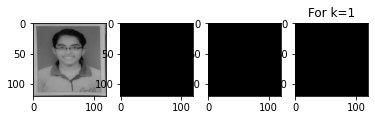

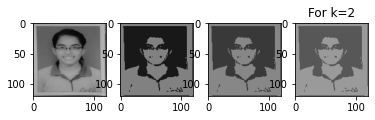

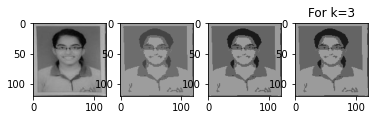

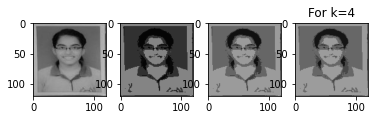

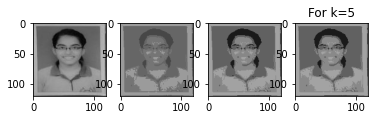

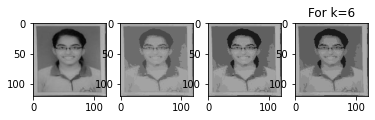

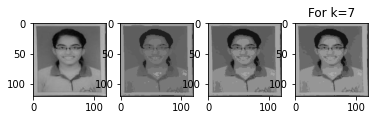

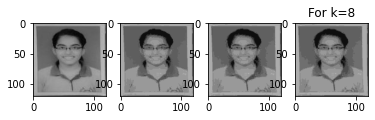

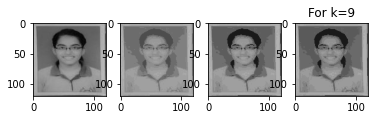

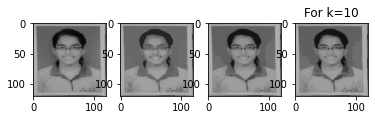

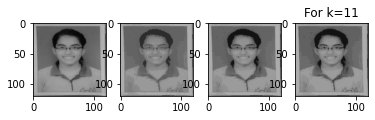

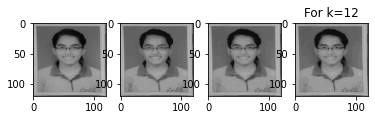

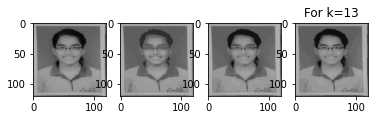

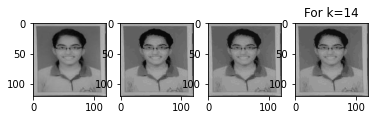

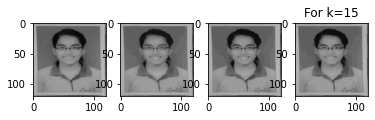

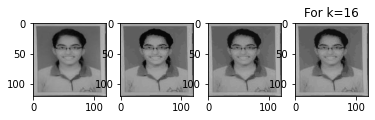

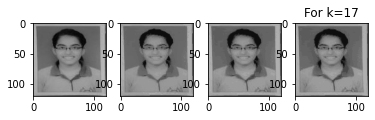

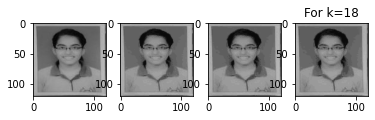

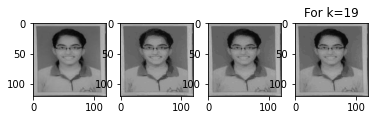

In [36]:
for k in range(1,20):
    image = (image/255).reshape(120*120,3)

    #Initilize the Centroids
    init_centroids_1 = random.sample(range(0,len(image)),k)
    #print(init_centroids_1)

    centroids_1=[]
    for i in init_centroids_1:
        centroids_1.append(image[i])

    centroids_1 = np.array(centroids_1)
    #print(centroids_1)

    centroids_for_display_epochs=[]
    for i in range(n):
        #print(i)
        get_centroid = findclosestcentroid(centroids_1,image)     #we have obtained the cluster number for each observation
        centroids_1 = calc_centroids(get_centroid,image)
        if(i==0):
            centroids_for_display_epochs.append(centroids_1)
        if(i==n//2):
            centroids_for_display_epochs.append(centroids_1)

    #recovering the Image for Each epochs displayed
    image_recovered_1 = image.copy()
    for i in range(len(image)):
        image_recovered_1[i] = centroids_for_display_epochs[0][get_centroid[i]]
    image_recovered_1_plot = image_recovered_1.reshape(120,120, 3)

    image_recovered_2 = image.copy()
    for i in range(len(image)):
        image_recovered_2[i] = centroids_for_display_epochs[1][get_centroid[i]]
    image_recovered_2_plot = image_recovered_2.reshape(120,120, 3)

    image_recovered_3 = image.copy()
    for i in range(len(image)):
        image_recovered_3[i] = centroids_1[get_centroid[i]]
    image_recovered_3_plot = image_recovered_3.reshape(120,120, 3)

    image = cv2.imread('PassportSizePhoto(BlackNWhite).jpg')
    fig,ax = plt.subplots(1,4)
    plt.title('For k='+str(k))
    ax[0].imshow(image)
    ax[1].imshow(image_recovered_1_plot)
    ax[2].imshow(image_recovered_2_plot)
    ax[3].imshow(image_recovered_3_plot)